#### Using average KO volume per turn to assign batch size

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

Import cleaned data:

In [2]:
df = pd.read_csv('BCS & BF results_cleaned.csv')

## Let's start exploring the data!

Most entries with a note indicate an issue with the accuracy of the data

In [3]:
df[df['Notes'].notnull()]

,Batch ID,FV Volume,Total Yield %,BT Volume,DAW,DAW %,Anticipated Yield,Packaged,discrepancy BT>Pack,discrepancy BT>Pack %,Notes,Brand,Brewery,Beer Volume,Beer Yield %,discrepancy Ant>BT,discrepancy Ant>BT %
22,NB-LOD-038,399.0,85.714286,342.00,22.0,6.432749,367.0,361.70,19.70,5.760234,Centrifuge shut down; lost total # bbls,NB-LOD,NB,320.00,80.200501,25.00,6.265664
43,LAW-SUN-065,315.0,108.253968,341.00,1.2,0.351906,300.0,294.60,-46.40,-13.607038,~300bbls dumped at FV by accident,LAW-SUN,LAW,339.80,107.873016,-41.00,-13.015873
44,LAW-SUP-028,314.0,96.019108,301.50,15.2,5.041459,268.0,300.13,-1.37,-0.454395,MF did not record beer fence flow meter after ...,LAW-SUP,LAW,286.30,91.178344,-33.50,-10.668790
53,TRB-OJ-005,290.0,78.103448,226.50,17.8,7.858720,NaN,236.93,10.43,4.604857,"Separation was stopped and started, #'s may no...",TRB-OJ,TRB,208.70,71.965517,NaN,NaN
63,TRB-HEF-050,328.0,60.975610,200.00,1.0,0.500000,295.0,184.93,-15.07,-7.535000,Left 100bbls in FV to test FPS (planned),TRB-HEF,TRB,199.00,60.670732,95.00,28.963415
68,SWA-SH-009,110.0,83.200000,91.52,3.5,3.824301,98.0,81.10,-10.42,-11.385490,BCS continued to count during post-run,SWA-SH,SWA,88.02,80.018182,6.48,5.890909
108,PK-FC-073,459.0,91.394336,419.50,10.9,2.598331,NaN,401.73,-17.77,-4.235995,"BBT overflowed during ""empty surge tank""step",PK-FC,PK,408.60,89.019608,NaN,NaN
148,PK-SF-010,219.0,91.324201,200.00,7.0,3.500000,250.0,185.51,-14.49,-7.245000,Volume not 100% accurate; BCS skipped over emp...,PK-SF,PK,193.00,88.127854,50.00,22.831050
226,LR-SHT-034,210.0,92.857143,195.00,5.0,2.564103,189.0,188.35,-6.65,-3.410256,"BBT overflowed, total volume is an estimate",LR-SHT,LR,190.00,90.476190,-6.00,-2.857143
280,TRB-R2R-137,517.0,85.106383,440.00,40.0,9.090909,476.0,414.22,-25.78,-5.859091,"BCS reset #'s during separation, volume not 10...",TRB-R2R,TRB,400.00,77.369439,36.00,6.963250


Exclude these from our analysis

In [3]:
df = df[df['Notes'].isna()]
df.drop(['Notes'], axis =1, inplace=True)

Plot all numeric data for a broad overview:

In [ ]:
num_data = df.select_dtypes(exclude=['object'])

In [ ]:
num_data.hist(figsize=(20,20))

Could never figure out how to export this figure. Did a screen shot instead.

In [ ]:
#fig = plt.gcf()
#fig = chart[0].get_figure()
#fig.savefig('histograms.png',transparent=False, dpi=80, bbox_inches="tight")
#plt.savefig('histograms.png')
#plt.get.savefig('histograms.png')

fig = plt.gcf()
fig.savefig('output.png',transparent=False, dpi=80)

In [22]:
df.dtypes

Batch ID                  object
FV Volume                float64
Total Yield %            float64
BT Volume                float64
DAW                      float64
DAW %                    float64
Anticipated Yield        float64
Packaged                 float64
discrepancy BT>Pack      float64
discrepancy BT>Pack %    float64
Notes                     object
Brand                     object
Brewery                   object
Beer Volume              float64
Beer Yield %             float64
discrepancy Ant>BT       float64
discrepancy Ant>BT %     float64
dtype: object

Select a few to analyze further, and plot using MPL so we can modify & save the figure:

In [5]:
cols_to_hist=['Beer Yield %', 'Total Yield %', 'discrepancy Ant>BT', 'discrepancy Ant>BT %', 'discrepancy BT>Pack', 'discrepancy BT>Pack %']
data_to_hist =df[cols_to_hist]

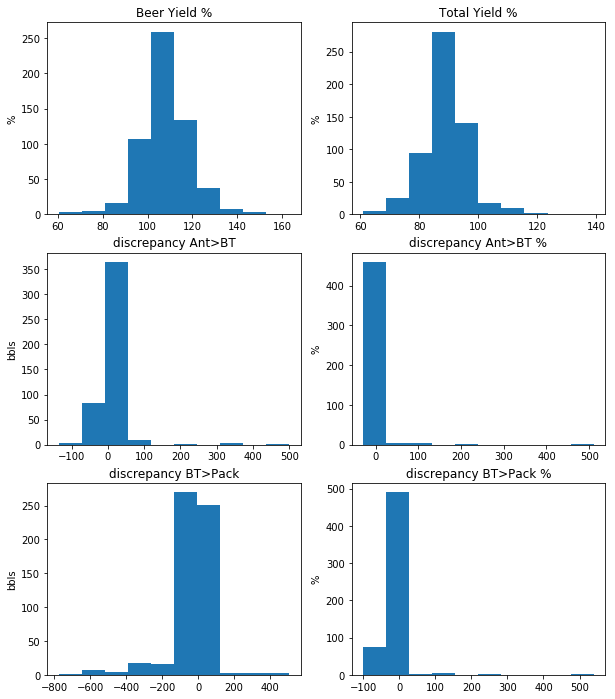

In [24]:
fig = plt.figure(figsize = (10,12))
nrows = 3
ncols = 2

for i, col in enumerate(cols_to_hist):
    data = df[col].dropna()
    ax = fig.add_subplot(nrows,ncols,i+1)
    ax.hist(data)
    #ax.set_ylim(60,130)
    #ax.tick_params(bottom='off',labelbottom='off')
    ax.set_title(col)
    if re.search("%",col) is not None:
        ax.set_ylabel('%')
    else:
        ax.set_ylabel('bbls')

#fig.suptitle('Total Yield % for core TRB brands', fontsize = 14)

In [21]:
fig.savefig('histograms.png', transparent=False, dpi=80, bbox_inches="tight")

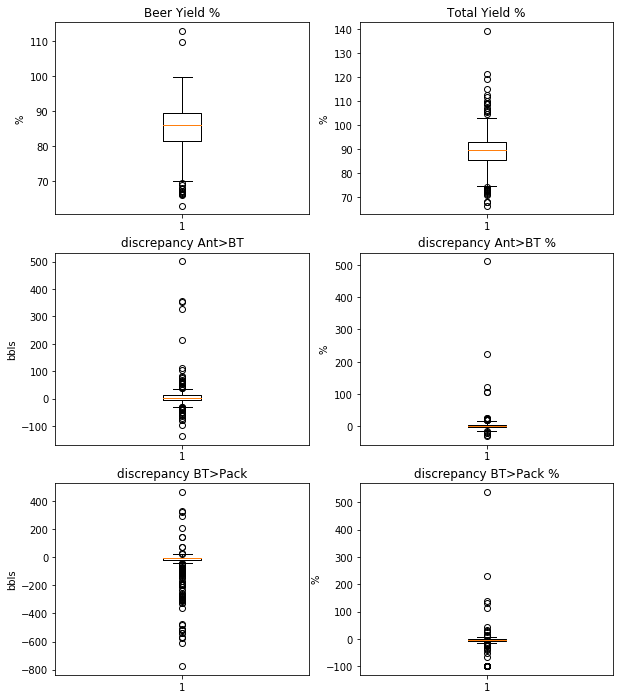

In [6]:
fig = plt.figure(figsize = (10,12))
nrows = 3
ncols = 2

for i, col in enumerate(cols_to_hist):
    data = df[col].dropna()
    ax = fig.add_subplot(nrows,ncols,i+1)
    ax.boxplot(data)
    #ax.set_ylim(60,103)
    #ax.tick_params(bottom='off',labelbottom='off')
    ax.set_title(col)
    if re.search("%",col) is not None:
        ax.set_ylabel('%')
    else:
        ax.set_ylabel('bbls')

#fig.suptitle('Total Yield % for core TRB brands', fontsize = 14)

In [22]:
fig.savefig('boxplots.png', transparent=False, dpi=80, bbox_inches="tight")

There appear to be some outliers, skewing the charts. Examine / remove those. 

In [60]:
def clip_data_plot(col,limit):
    data = df[df[col].abs()<limit]
    fig = plt.figure(figsize=(5,8))
    
    ax1 = fig.add_subplot(211)
    ax1.hist(data[col].dropna())
    ax1.set_ylabel('# of batches')
    #ax1.get_xaxis().set_ticks([])
    
    ax2 = fig.add_subplot(212, sharex=ax1)
    ax2.boxplot(data[col].dropna(), vert=False)
    ax2.tick_params(left='off',labelleft='off')
    
    if re.search("%",col) is not None:
        ax2.set_xlabel('% difference')
    else:
        ax2.set_xlabel('bbls difference')
    
    fig.suptitle(col)
    #plt.show()

    print(data[col].describe())

count    460.000000
mean       3.372587
std       20.248361
min      -96.300000
25%       -4.600000
50%        3.300000
75%       12.425000
max       95.000000
Name: discrepancy Ant>BT, dtype: float64


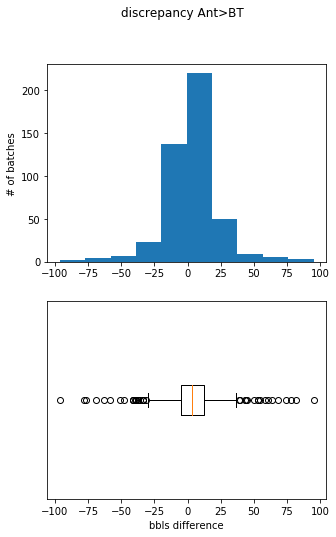

In [24]:
col3 = 'discrepancy Ant>BT'
clip_data_plot(col3,100)

In [ ]:
col4 = 'discrepancy Ant>BT %'
clip_data_plot(col4,40)

In [ ]:
col5 = 'discrepancy BT>Pack'
clip_data_plot(col5,100)

count    446.000000
mean      -3.092058
std        5.352776
min      -27.221865
25%       -5.352713
50%       -2.973340
75%       -0.754977
max       26.967655
Name: discrepancy BT>Pack %, dtype: float64


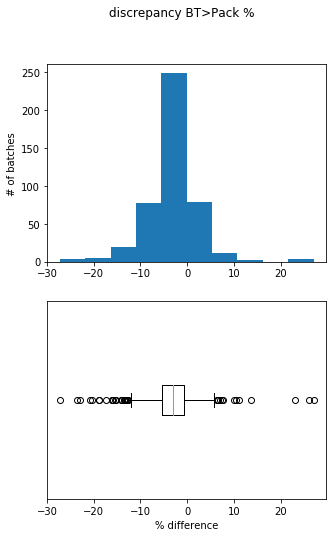

In [61]:
col6 = 'discrepancy BT>Pack %'
clip_data_plot(col6,40)

In [ ]:
col3 = 'Anticipated vs BT Volume'
data3 = df[df[col3].abs()< 100]
data3[col3].hist()

In [ ]:
#df[df[col3].abs() > 50]

Pivot Table for data summary

In [ ]:
cols_to_pivot = ['Total Yield %', 'DAW %', 'Anticipated vs Actual %', 'discrepancy BCS>Pack %', 'discrepancy BF>Pack %']

trb_pt = df[df['Brewery'] == 'TRB'].pivot_table(index=['Brand'], values = cols_to_pivot, aggfunc=[np.mean, np.std, np.min, np.max, len])

pt = df.pivot_table(index=['Brand'], values = cols_to_pivot, aggfunc=[np.mean, np.std, np.min, np.max, len])

trb_filt = trb_pt[trb_pt['len']['DAW %'] > 4]

pt_filt = pt[pt['len']['DAW %'] > 4]

# Two Roads Brands

In [4]:
brand_list = ['TRB-CBS','TRB-HEF','TRB-LH','TRB-OJ','TRB-PILS','TRB-R2R','TRB-WIPA','TRB-WCS']

Clip df to exclude obvious (?) outliers:

In [5]:
df.dtypes

Batch ID                  object
FV Volume                float64
Total Yield %            float64
BT Volume                float64
DAW                      float64
DAW %                    float64
Anticipated Yield        float64
Packaged                 float64
discrepancy BT>Pack      float64
discrepancy BT>Pack %    float64
Notes                     object
Brand                     object
Brewery                   object
Beer Volume              float64
Beer Yield %             float64
discrepancy Ant>BT       float64
discrepancy Ant>BT %     float64
dtype: object

In [8]:
col3 = 'discrepancy Ant>BT'
col4 = 'discrepancy Ant>BT %'
col5 = 'discrepancy BT>Pack'
col6 = 'discrepancy BT>Pack %'

In [7]:
df = df[(df[col3].abs() < 100) & (df[col5].abs() <100) & (df[col4]<40) & (df[col6]<40)]

Text(0.5,0.98,'Total Yield % for core TRB brands')

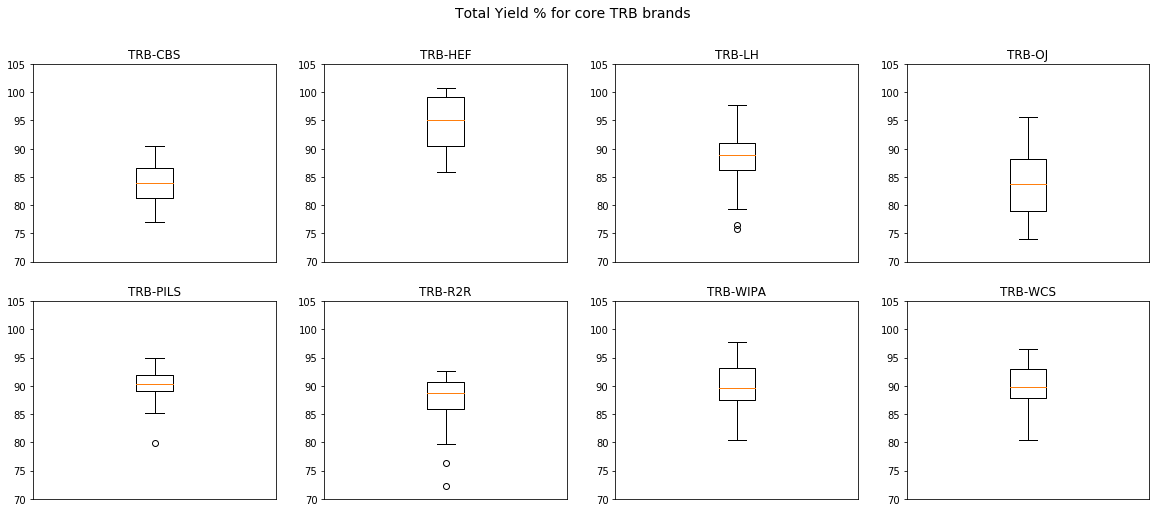

In [11]:
fig = plt.figure(figsize = (20,8))
nrows = 2
ncols = 4
col_to_plot = 'Total Yield %'

for i, brand in enumerate(brand_list):
    data = df[df['Brand'] == brand][col_to_plot]
    ax = fig.add_subplot(nrows,ncols,i+1)
    ax.boxplot(data)
    ax.set_ylim(70,105)
    ax.tick_params(bottom='off',labelbottom='off')
    ax.set_title(brand)

fig.suptitle(col_to_plot + ' for core TRB brands', fontsize = 14)

In [50]:
fig.savefig('trb total yields.png', transparent=False, dpi=80, bbox_inches="tight")

Text(0.5,0.98,'Total Yield % for core TRB brands')

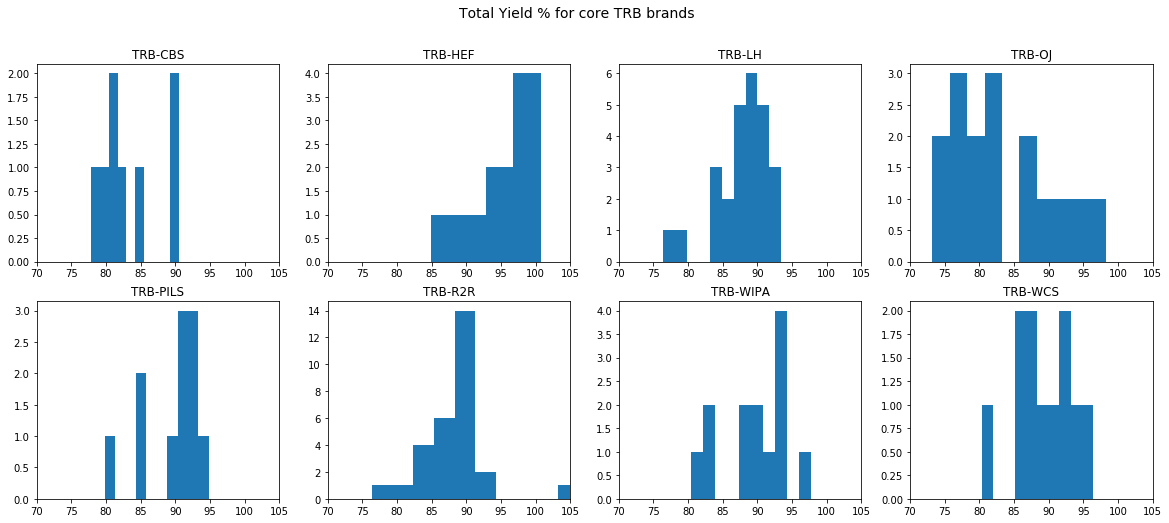

In [9]:
fig = plt.figure(figsize = (20,8))
nrows = 2
ncols = 4
col_to_plot = 'Total Yield %'

for i, brand in enumerate(brand_list):
    data = df[df['Brand'] == brand][col_to_plot]
    ax = fig.add_subplot(nrows,ncols,i+1)
    ax.hist(data)
    ax.set_xlim(70,105)
    #ax.tick_params(bottom='off',labelbottom='off')
    ax.set_title(brand)

fig.suptitle(col_to_plot + ' for core TRB brands', fontsize = 14)

In [31]:
fig.savefig('trb total yields - hist.png', transparent=False, dpi=80, bbox_inches="tight")

Text(0.5,0.98,'discrepancy Ant>BT for core TRB brands')

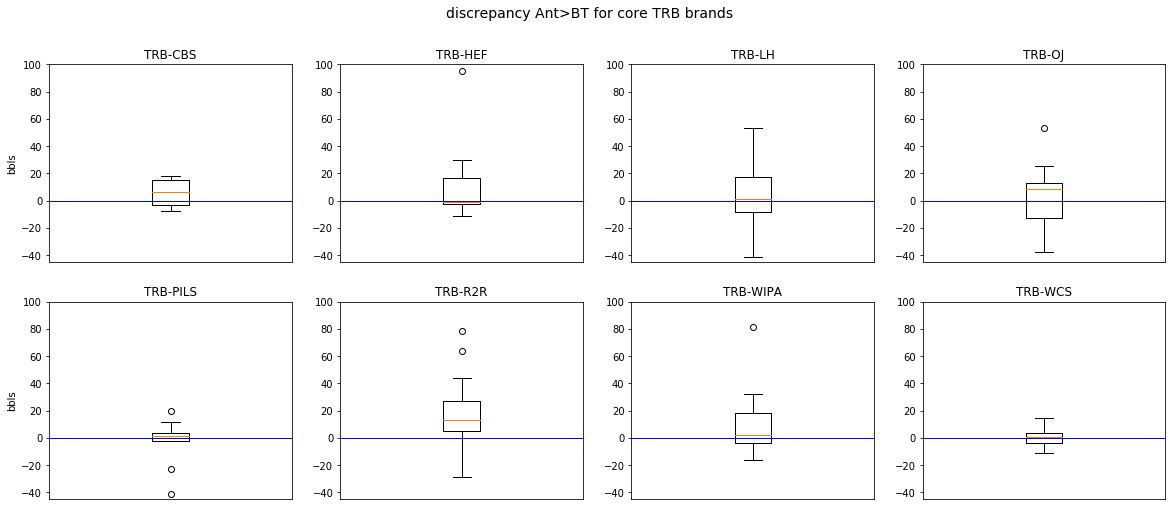

In [44]:
fig = plt.figure(figsize = (20,8))
nrows = 2
ncols = 4
col_to_plot = col3

for i, brand in enumerate(brand_list):
    data = df[df['Brand'] == brand][col_to_plot].dropna()
    ax = fig.add_subplot(nrows,ncols,i+1)
    ax.boxplot(data)
    ax.set_ylim(-45,100)
    ax.tick_params(bottom='off',labelbottom='off')
    ax.set_title(brand)
    ax.axhline(y=0, color='b',linewidth=1)
    
    if i in (0,4):
        ax.set_ylabel('bbls')

fig.suptitle(col_to_plot + ' for core TRB brands', fontsize = 14)

In [46]:
fig.savefig('trb ant vs bt vol bbls box.png', transparent=False, dpi=80, bbox_inches="tight")

Text(0.5,0.98,'discrepancy Ant>BT % for core TRB brands')

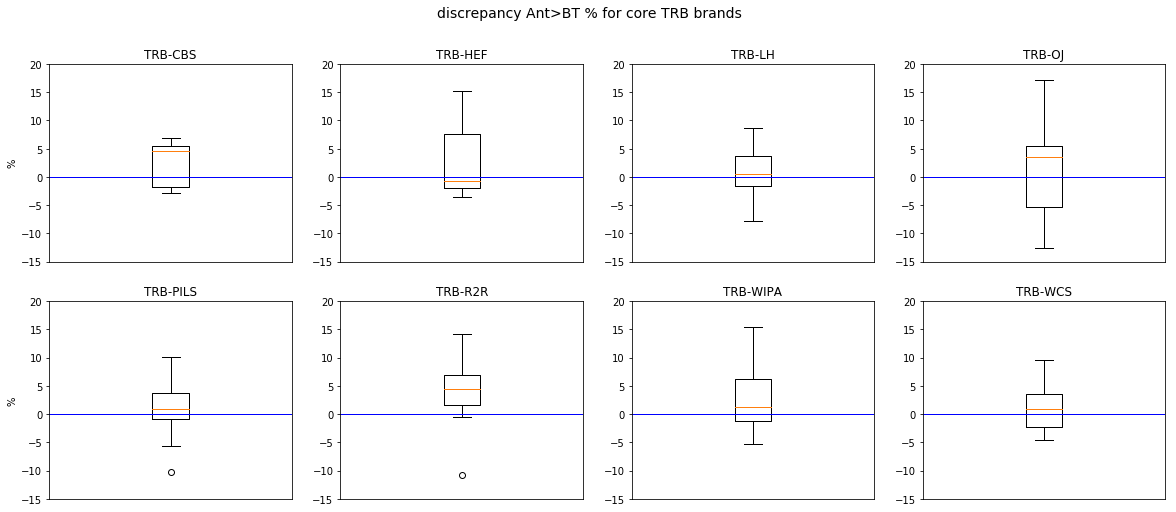

In [46]:
fig = plt.figure(figsize = (20,8))
nrows = 2
ncols = 4
col_to_plot = col4

for i, brand in enumerate(brand_list):
    data = df[df['Brand'] == brand][col_to_plot].dropna()
    ax = fig.add_subplot(nrows,ncols,i+1)
    ax.boxplot(data)
    ax.set_ylim(-15,20)
    ax.tick_params(bottom='off',labelbottom='off')
    ax.set_title(brand)
    ax.axhline(y=0, color='b',linewidth=1)
    
    if i in (0,4):
        ax.set_ylabel('%')

fig.suptitle(col_to_plot + ' for core TRB brands', fontsize = 14)

In [47]:
fig.savefig('trb anticipate vs bt yields % box.png', transparent=False, dpi=80, bbox_inches="tight")

Text(0.5,0.98,'discrepancy BT>Pack for core TRB brands')

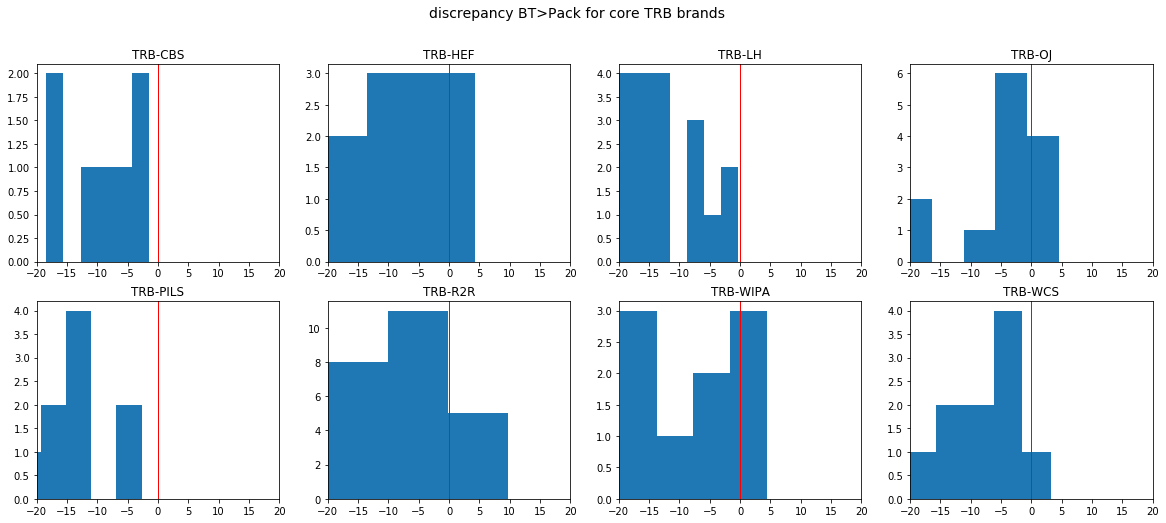

In [43]:
fig = plt.figure(figsize = (20,8))
nrows = 2
ncols = 4
col_to_plot = col5

for i, brand in enumerate(brand_list):
    data = df[df['Brand'] == brand][col_to_plot].dropna()
    ax = fig.add_subplot(nrows,ncols,i+1)
    ax.hist(data)
    ax.set_xlim(-20,20)
    #ax.tick_params(bottom='off',labelbottom='off')
    ax.set_title(brand)
    ax.axvline(x=0, color='r',linewidth=1)

fig.suptitle(col_to_plot + ' for core TRB brands', fontsize = 14)

In [ ]:
fig.savefig('trb anticipated vs bt yields % - hist.png', transparent=False, dpi=80, bbox_inches="tight")

In [19]:
def hist_and_boxplot(col,brand):
    '''(col, brand) --> histogram & boxplot
    '''
    data = df[df['Brand'] == brand][col].dropna()
    fig = plt.figure(figsize=(5,8))
    
    ax1 = fig.add_subplot(211)
    ax1.hist(data)
    ax1.set_ylabel('# of batches')
    #ax1.get_xaxis().set_ticks([])
    
    ax2 = fig.add_subplot(212, sharex=ax1)
    ax2.boxplot(data, vert=False)
    ax2.tick_params(left='off',labelleft='off')
    
    if re.search("%",col) is not None:
        ax2.set_xlabel('% difference')
    else:
        ax2.set_xlabel('bbls difference')
    
    fig.suptitle(brand + ": " + col)
    #plt.show()

    print(data.describe())

count    29.000000
mean    -11.081172
std      18.254170
min     -89.720000
25%     -14.340000
50%      -6.904000
75%      -2.400000
max       9.800000
Name: discrepancy BT>Pack, dtype: float64


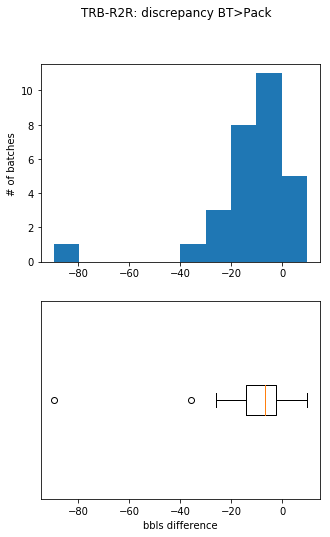

In [18]:
hist_and_boxplot(col5,'TRB-R2R')

count    29.000000
mean     -3.875652
std       5.246177
min     -18.900358
25%      -5.411190
50%      -2.653950
75%      -0.931315
max       2.183353
Name: discrepancy BT>Pack %, dtype: float64


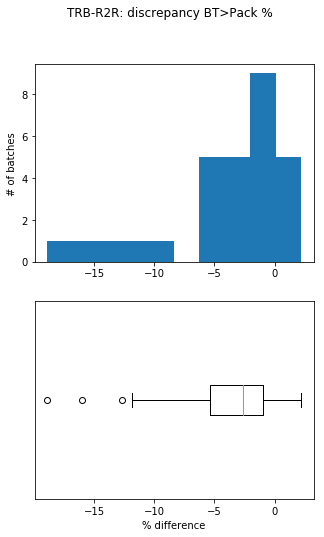

In [20]:
hist_and_boxplot(col6,'TRB-R2R')

In [47]:
cols_to_hist

['Beer Yield %',
 'Total Yield %',
 'discrepancy Ant>BT',
 'discrepancy Ant>BT %',
 'discrepancy BT>Pack',
 'discrepancy BT>Pack %']

In [56]:
def all_the_plots(brand):
    '''(col, brand) --> histogram & boxplot
    '''
    #data = df[df['Brand'] == brand][col].dropna()
    
    fig = plt.figure(figsize=(24,6))
    
    for i, col in enumerate(cols_to_hist):
        data = df[df['Brand'] == brand][col].dropna()
        ax1 = fig.add_subplot(2,6,i+1)
        ax1.hist(data)
        ax1.set_ylabel('# of batches')
        #ax1.get_xaxis().set_ticks([])
        ax1.set_title(col)
        
        ax2 = fig.add_subplot(2,6,i+7, sharex=ax1)
        ax2.boxplot(data, vert=False)
        ax2.tick_params(left='off',labelleft='off')
    
        if re.search("%",col) is not None:
            ax2.set_xlabel('% difference')
        else:
            ax2.set_xlabel('bbls difference')
        
    
    fig.suptitle(brand, fontsize=20)

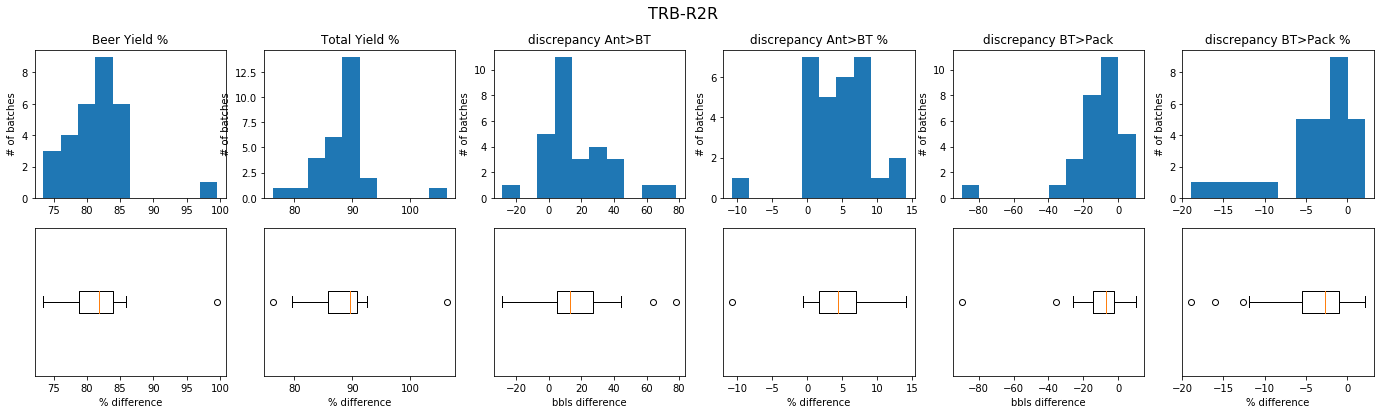

In [57]:
all_the_plots('TRB-R2R')

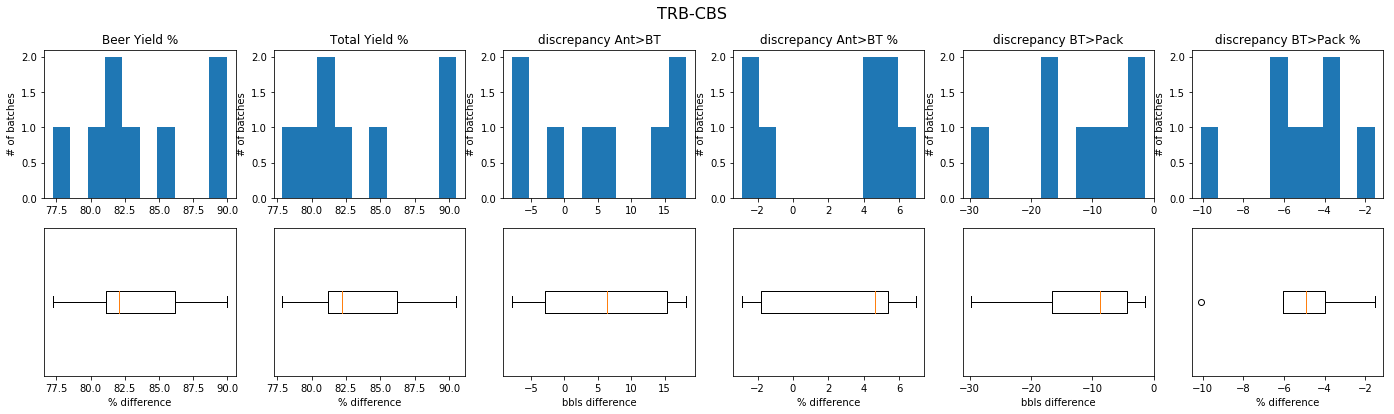

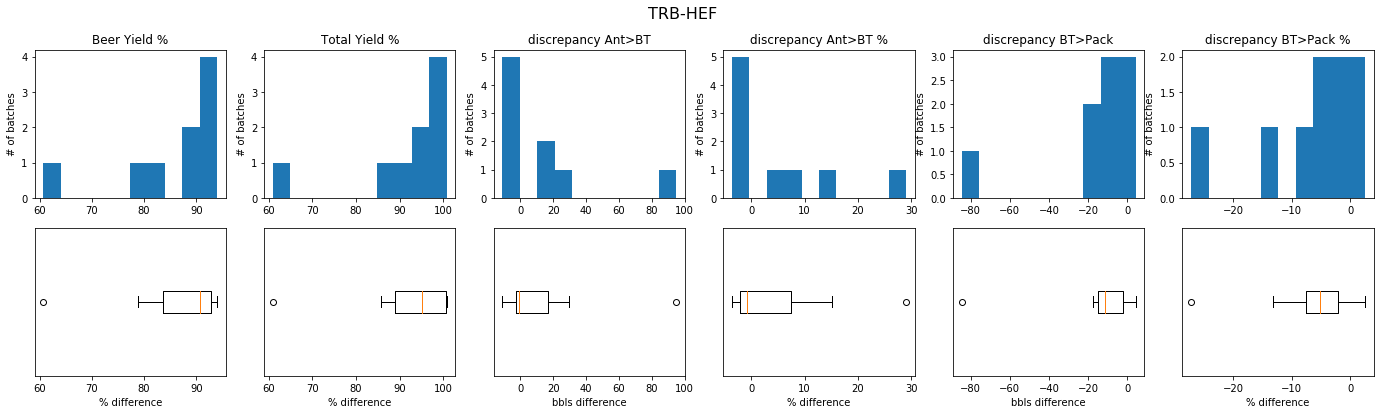

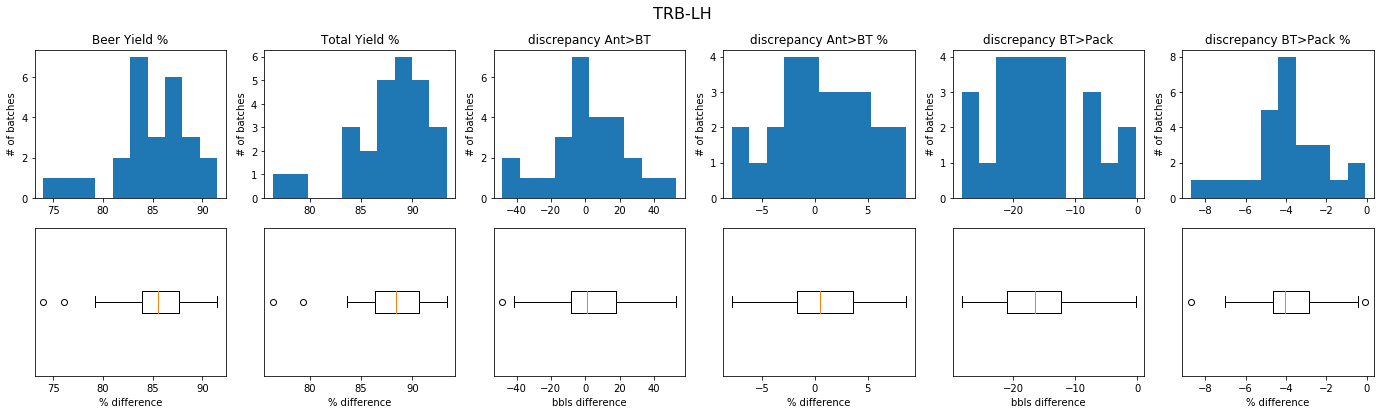

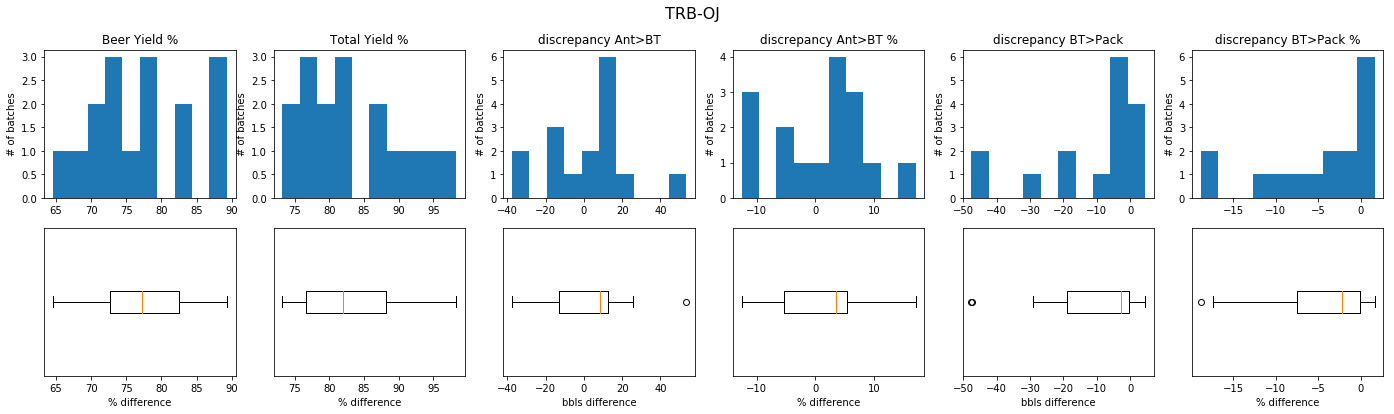

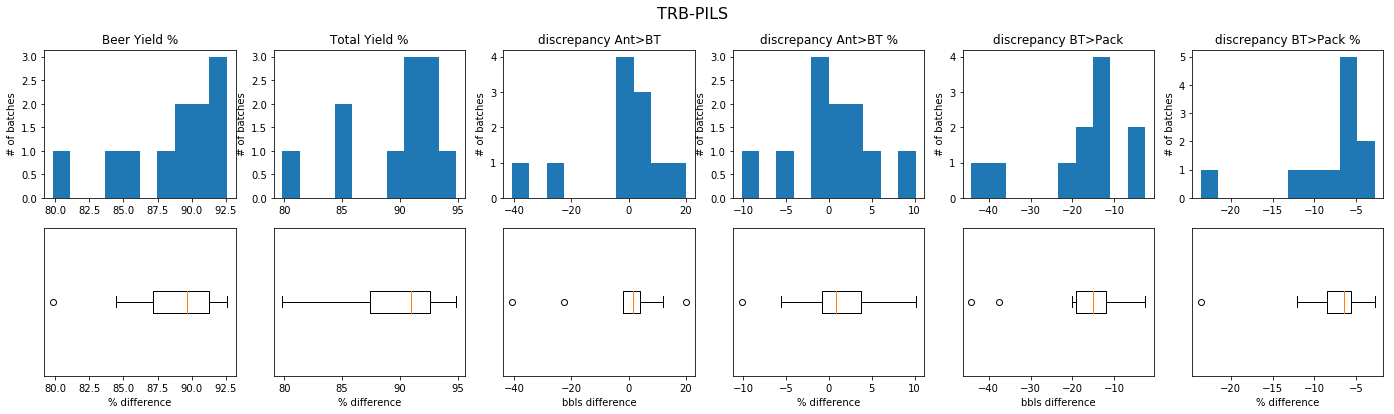

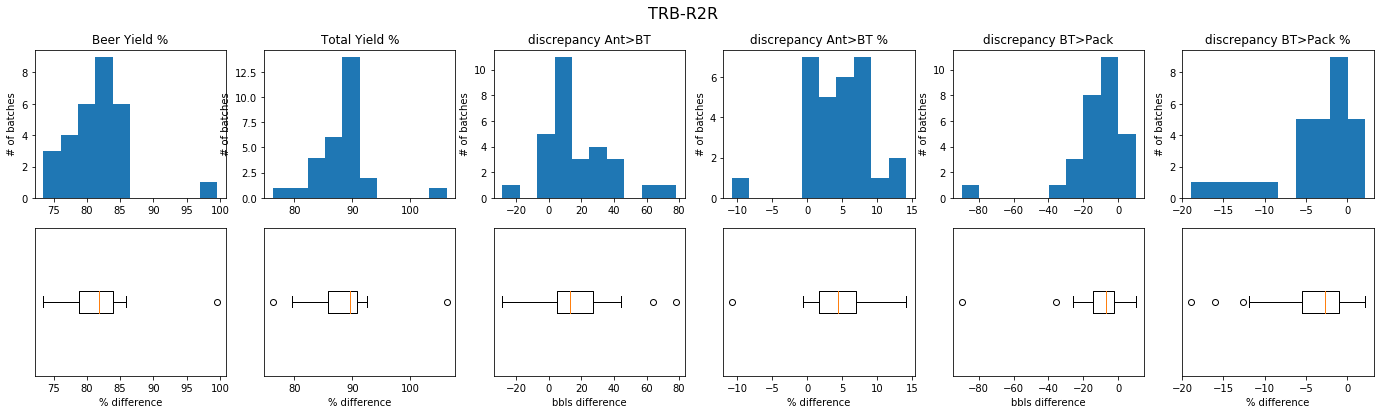

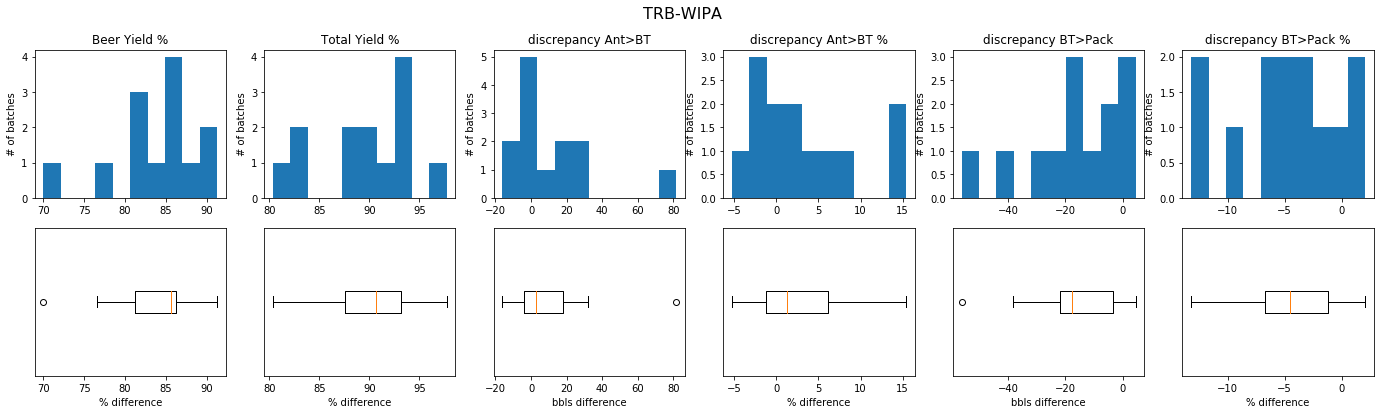

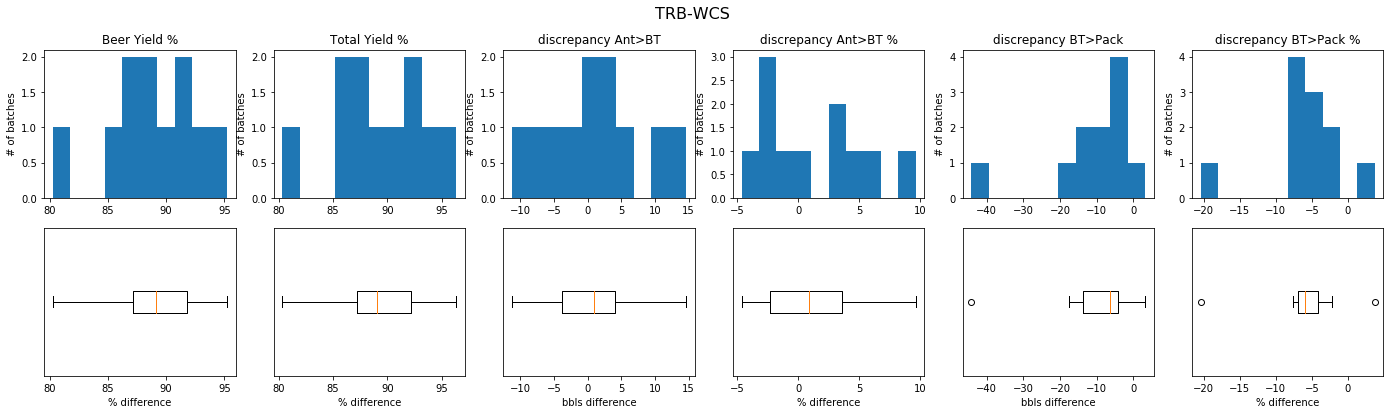

In [58]:
for brand in brand_list:
    all_the_plots(brand)

In [62]:
df.dtypes

Batch ID                  object
FV Volume                float64
Total Yield %            float64
BT Volume                float64
DAW                      float64
DAW %                    float64
Anticipated Yield        float64
Packaged                 float64
discrepancy BT>Pack      float64
discrepancy BT>Pack %    float64
Notes                     object
Brand                     object
Brewery                   object
Beer Volume              float64
Beer Yield %             float64
discrepancy Ant>BT       float64
discrepancy Ant>BT %     float64
dtype: object

## Batch Size

(array([  2., 108.,  97.,   3.,  12.,  26.,  30.,   4.,  10.,  61.,  95.,
          5.,   1.,   2.,   4.,   8.,   0.,   1.,   4.,  18.,  19.,   5.,
         23.,  15.,   2.,   2.,   2.]),
 array([ 60.,  85., 110., 135., 160., 185., 210., 235., 260., 285., 310.,
        335., 360., 385., 410., 435., 460., 485., 510., 535., 560., 585.,
        610., 635., 660., 685., 710., 735.]),
 <a list of 27 Patch objects>)

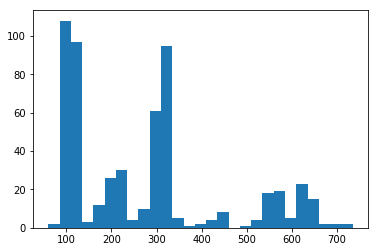

In [12]:
data = df['FV Volume']
binwidth = 25
num_bins=np.arange(min(data), max(data) + binwidth, binwidth)
plt.hist(data, bins = num_bins)

Text(0,0.5,'Total Yield (%) to BT')

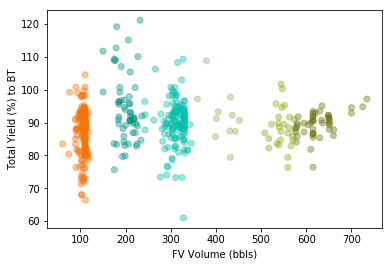

In [397]:
fig = plt.figure()
ax = fig.add_subplot(111)

def apply_colors(vol):
    if vol in range(0,120):
        color = '#f97306'  #orange
    elif vol in range(150,240):
        color = '#029386'  #teal
    elif vol in range(241, 350):
        color = '#06c2ac'  #turquoise
    elif vol in range(351,455):
        color = '#aaa662'   #khaki
    elif vol in range(456,575):
        color = '#8eab12'   #pea green
    else:
        color = '#6e750e'  #olive

    return color

#color_legend = {keys = ['orange', 'teal', 'turquoise','khaki', 'pea grean', 'olive'],
 #              values = ['#f97306', '#029386','06c2ac', '#aaa662', '#8eab12', '#6e750e']}


color_list = ['#f97306', '#029386','06c2ac', '#aaa662', '#8eab12', '#6e750e']

    
colors = df['FV Volume'].apply(apply_colors)
        
ax.scatter(x=df['FV Volume'], y=df['Total Yield %'], color = colors, alpha=0.4)
ax.set_xlabel('FV Volume (bbls)')
ax.set_ylabel('Total Yield (%) to BT')

In [398]:
fig.savefig('fv vol vs total yield % - scatter with color.png', transparent=False, dpi=80, bbox_inches="tight")

In [13]:
df[df['Brand'] == 'TRB-R2R']

,Batch ID,FV Volume,Total Yield %,BT Volume,DAW,DAW %,Anticipated Yield,Packaged,discrepancy BT>Pack,discrepancy BT>Pack %,Brand,Brewery,Beer Volume,Beer Yield %,discrepancy Ant>BT,discrepancy Ant>BT %
1,TRB-R2R-122,566.0,82.862191,469.0,43.80,9.339019,533.0,471.000,2.000,0.426439,TRB-R2R,TRB,425.20,75.123675,64.0,11.307420
21,TRB-R2R-124,266.0,106.240602,282.6,17.70,6.263270,254.0,246.800,-35.800,-12.668082,TRB-R2R,TRB,264.90,99.586466,-28.6,-10.751880
24,TRB-R2R-123,573.0,90.977312,521.3,45.30,8.689814,519.0,531.100,9.800,1.879916,TRB-R2R,TRB,476.00,83.071553,-2.3,-0.401396
40,TRB-R2R-125,575.0,88.121739,506.7,39.55,7.805408,520.0,504.900,-1.800,-0.355240,TRB-R2R,TRB,467.15,81.243478,13.3,2.313043
64,TRB-R2R-126,570.0,85.842105,489.3,47.80,9.769058,523.0,475.240,-14.060,-2.873493,TRB-R2R,TRB,441.50,77.456140,33.7,5.912281
76,TRB-R2R-127,88.0,90.909091,80.0,5.70,7.125000,86.0,75.460,-4.540,-5.675000,TRB-R2R,TRB,74.30,84.431818,6.0,6.818182
102,TRB-R2R-128,580.0,85.879310,498.1,40.80,8.191126,524.0,477.230,-20.870,-4.189922,TRB-R2R,TRB,457.30,78.844828,25.9,4.465517
114,TRB-R2R-129,286.0,86.573427,247.6,16.60,6.704362,267.0,237.060,-10.540,-4.256866,TRB-R2R,TRB,231.00,80.769231,19.4,6.783217
124,TRB-R2R-130,293.0,90.887372,266.3,20.40,7.660533,275.0,251.890,-14.410,-5.411190,TRB-R2R,TRB,245.90,83.924915,8.7,2.969283
164,TRB-R2R-131,293.0,88.771331,260.1,19.30,7.420223,265.0,255.370,-4.730,-1.818531,TRB-R2R,TRB,240.80,82.184300,4.9,1.672355


In [17]:
df[df['Brand'] == 'TRB-R2R']['FV Volume'] / 94.0

1      6.021277
21     2.829787
24     6.095745
40     6.117021
64     6.063830
76     0.936170
102    6.170213
114    3.042553
124    3.117021
164    3.117021
176    6.170213
188    3.000000
195    3.031915
214    5.744681
237    5.723404
289    2.787234
325    5.968085
343    4.819149
359    2.989362
380    5.787234
398    6.063830
412    1.957447
430    5.734043
444    4.808511
464    1.031915
481    5.946809
499    3.074468
502    2.053191
508    1.968085
547    2.957447
559    5.776596
572    4.787234
Name: FV Volume, dtype: float64

### Assign batch size based on volume (we don't have tank info):

In [8]:
#brand_list = ['TRB-CBS','TRB-HEF','TRB-LH','TRB-OJ','TRB-PILS','TRB-R2R','TRB-WIPA','TRB-WCS']
avg_KOs = [107.4, 105.4, 104.6, 99, 102.72, 94.0, 103.5, 113.2]
KO_by_brand = dict(zip(brand_list,avg_KOs))

In [9]:
KO_by_brand

{'TRB-CBS': 107.4,
 'TRB-HEF': 105.4,
 'TRB-LH': 104.6,
 'TRB-OJ': 99,
 'TRB-PILS': 102.72,
 'TRB-R2R': 94.0,
 'TRB-WCS': 113.2,
 'TRB-WIPA': 103.5}

In [20]:
trb_df = df[df['Brand'].isin(brand_list)]

In [19]:
df.drop(columns='Num Turns', axis=0, inplace = True)

In [22]:
trb_df['Num Turns'] = trb_df['FV Volume']/trb_df['Brand'].map(KO_by_brand)

C:\Users\Kendra\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [23]:
trb_df['Batch Size'] = round(trb_df['Num Turns'],0) * 100

C:\Users\Kendra\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [24]:
trb_df.head()

,Batch ID,FV Volume,Total Yield %,BT Volume,DAW,DAW %,Anticipated Yield,Packaged,discrepancy BT>Pack,discrepancy BT>Pack %,Brand,Brewery,Beer Volume,Beer Yield %,discrepancy Ant>BT,discrepancy Ant>BT %,Num Turns,Batch Size
1,TRB-R2R-122,566.0,82.862191,469.0,43.8,9.339019,533.0,471.00,2.00,0.426439,TRB-R2R,TRB,425.2,75.123675,64.0,11.307420,6.021277,600.0
3,TRB-CBS-015,109.0,77.889908,84.9,0.7,0.824499,90.0,80.25,-4.65,-5.477032,TRB-CBS,TRB,84.2,77.247706,5.1,4.678899,1.014898,100.0
4,TRB-WIPA-089,308.0,87.012987,268.0,3.0,1.119403,NaN,NaN,NaN,NaN,TRB-WIPA,TRB,265.0,86.038961,NaN,NaN,2.975845,300.0
5,TRB-LH-078,615.0,86.341463,531.0,23.9,4.500942,550.0,528.84,-2.16,-0.406780,TRB-LH,TRB,507.1,82.455285,19.0,3.089431,5.879541,600.0
9,TRB-OJ-004,291.0,95.532646,278.0,24.5,8.812950,260.0,282.50,4.50,1.618705,TRB-OJ,TRB,253.5,87.113402,-18.0,-6.185567,2.939394,300.0


In [32]:
batch_size_data = []
brand = 'TRB-R2R'

for i in range(1,7):
   batch_size_data.append(trb_df[(trb_df['Batch Size'] == i*100) & (trb_df['Brand'] == brand)])

Text(0.5,1.1,'Total Yield (%) by batch size for TRB-R2R')

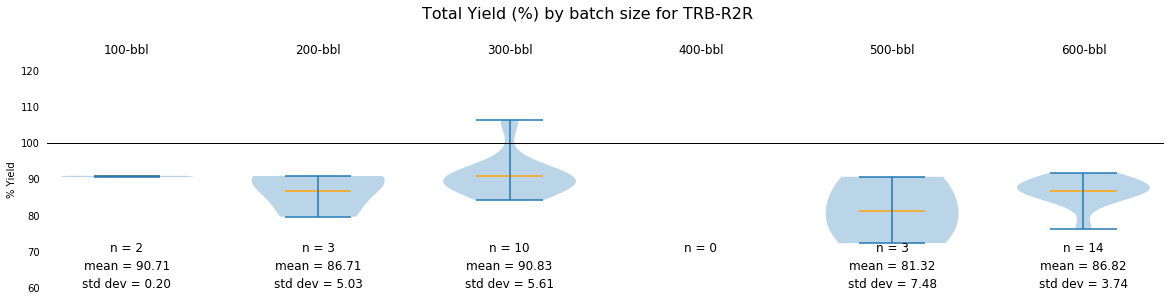

In [33]:
fig = plt.figure(figsize = (20,4))
ycol = 'Total Yield %'

for i, data in enumerate(r2r_batch_size_data):
    data_to_plot = data[ycol]
    
    ax1 = fig.add_subplot(1,6,i+1)
    ax1.set_ylim(60,120)
    ax1.set_xlim(0.7,1.3)
    for spine in ax1.spines.values():
        spine.set_visible(False)
    ax1.tick_params(bottom='off', left='off', labelleft='off', labelbottom='off')
    ax1.set_title(str((i+1)*100) + "-bbl", y=1.05)
    ax1.text(1,70,'n = ' + str(len(data_to_plot)),horizontalalignment='center', fontsize=12)
    
    if i == 0:
        ax1.tick_params(labelleft='on')
        ax1.set_ylabel('% Yield')
        ax1.axhline(y=100, color='black',linewidth=1, xmin=0.1, xmax = 1.1, clip_on=False)
    elif i == len(batch_size_data)-1:
        ax1.axhline(y=100, color='black',linewidth=1, xmin=-0.1, xmax=1, clip_on=False)
    else:
        ax1.axhline(y=100, color='black',linewidth=1, xmin=-0.1, xmax = 1.1, clip_on=False)
    
    
    if len(data) != 0:
        vp = ax1.violinplot(data_to_plot, showmeans=True)
        
        ax1.axhline(y=100, color='black',linewidth=1)
        #ax1.set_axis_off()
        
        ax1.text(1,65,'mean = ' + "{:.2f}".format(np.mean(data_to_plot)),horizontalalignment='center', fontsize=12)
        ax1.text(1,60,'std dev = ' + "{:.2f}".format(np.std(data_to_plot)),horizontalalignment='center', fontsize=12)
        #ax1.text(1,70,'n = ' + str(len(data_to_plot)),horizontalalignment='center', fontsize=12)
        vp['cmeans'].set_edgecolor('orange')
    
    
fig.suptitle('Total Yield (%) by batch size for TRB-R2R',fontsize=16, y=1.1)
        

Text(0.5,1.1,'Total Yield (%) by batch size for TRB-R2R')

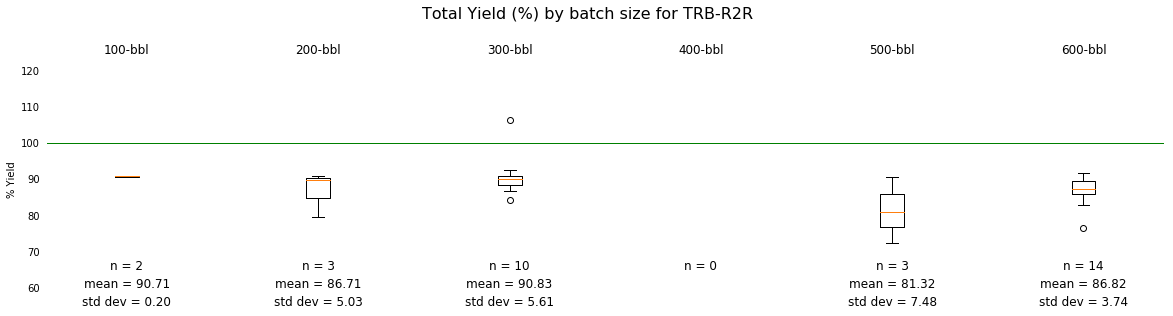

In [44]:
fig = plt.figure(figsize = (20,4))
ycol = 'Total Yield %'

for i, data in enumerate(r2r_batch_size_data):
    data_to_plot = data[ycol]
    
    ax1 = fig.add_subplot(1,6,i+1)
    ax1.set_ylim(60,120)
    ax1.set_xlim(0.7,1.3)
    for spine in ax1.spines.values():
        spine.set_visible(False)
    ax1.tick_params(bottom='off', left='off', labelleft='off', labelbottom='off')
    ax1.set_title(str((i+1)*100) + "-bbl", y=1.05)
    ax1.text(1,65,'n = ' + str(len(data_to_plot)),horizontalalignment='center', fontsize=12)
    
    if i == 0:
        ax1.tick_params(labelleft='on')
        ax1.set_ylabel('% Yield')
        ax1.axhline(y=100, color='green',linewidth=1, xmin=0.1, xmax = 1.1, clip_on=False)
    elif i == len(batch_size_data)-1:
        ax1.axhline(y=100, color='green',linewidth=1, xmin=-0.1, xmax=1, clip_on=False)
    else:
        ax1.axhline(y=100, color='green',linewidth=1, xmin=-0.1, xmax = 1.1, clip_on=False)
    
    
    if len(data) != 0:
        vp = ax1.boxplot(data_to_plot)
        
        ax1.axhline(y=100, color='green',linewidth=1)
        #ax1.set_axis_off()
        
        ax1.text(1,60,'mean = ' + "{:.2f}".format(np.mean(data_to_plot)),horizontalalignment='center', fontsize=12)
        ax1.text(1,55,'std dev = ' + "{:.2f}".format(np.std(data_to_plot)),horizontalalignment='center', fontsize=12)
        #ax1.text(1,70,'n = ' + str(len(data_to_plot)),horizontalalignment='center', fontsize=12)
        #vp['cmeans'].set_edgecolor('orange')
    
    
fig.suptitle('Total Yield (%) by batch size for TRB-R2R',fontsize=16, y=1.1)
        

In [316]:
fig.savefig('R2R total yield % by batch size - violin', transparent=False, dpi=80, bbox_inches="tight")

In [330]:
batch_size_pivot = df.pivot_table(index=['Brand','Batch Size'], values=['Total Yield %'], aggfunc=[len, np.mean, np.std, np.min, np.max])

In [342]:
batch_size_pivot.to_csv('yield by batch size.csv')
#lg_num.to_csv('')

In [37]:
def plot_data_brand_bsize(brand):
    
    batch_size_data = []
    
    for i in range(1,7):
        batch_size_data.append(df[(df['Batch Size'] == i*100) & (df['Brand'] == brand)])
    
    fig = plt.figure(figsize = (20,4))

    for i, data in enumerate(batch_size_data):
        data_to_plot = data[ycol]

        ax1 = fig.add_subplot(1,6,i+1)
        ax1.set_ylim(60,120)
        ax1.set_xlim(0.7,1.3)
        for spine in ax1.spines.values():
            spine.set_visible(False)
        ax1.tick_params(bottom='off', left='off', labelleft='off', labelbottom='off')
        ax1.set_title(str((i+1)*100) + "-bbl", y=1.05)
        ax1.text(1,70,'n = ' + str(len(data_to_plot)),horizontalalignment='center', fontsize=12)

        if i == 0:
            ax1.tick_params(labelleft='on')
            ax1.set_ylabel('% Yield')
            ax1.axhline(y=100, color='black',linewidth=1, xmin=0.1, xmax = 1.1, clip_on=False)
        elif i == len(batch_size_data)-1:
            ax1.axhline(y=100, color='black',linewidth=1, xmin=-0.1, xmax=1, clip_on=False)
        else:
            ax1.axhline(y=100, color='black',linewidth=1, xmin=-0.1, xmax = 1.1, clip_on=False)

        if len(data) != 0:
            vp = ax1.violinplot(data_to_plot, showmeans=True)
            ax1.axhline(y=100, color='black',linewidth=1)
            ax1.text(1,65,'mean = ' + "{:.2f}".format(np.mean(data_to_plot)),horizontalalignment='center', fontsize=12)
            ax1.text(1,60,'std dev = ' + "{:.2f}".format(np.std(data_to_plot)),horizontalalignment='center', fontsize=12)
            vp['cmeans'].set_edgecolor('orange')

    fig.suptitle('Total Yield (%) by batch size for ' + brand,fontsize=16, y=1.1)
    
    fig.savefig(brand + ' total yield % by batch size - violin', transparent=False, dpi=80, bbox_inches="tight")

In [52]:
def violin_plot_trb_brand_bsize(brand, ycol):
    
    batch_size_data = []
    
    for i in range(1,7):
        batch_size_data.append(trb_df[(trb_df['Batch Size'] == i*100) & (trb_df['Brand'] == brand)])
    
    fig = plt.figure(figsize = (20,4))

    for i, data in enumerate(batch_size_data):
        data_to_plot = data[ycol]

        ax1 = fig.add_subplot(1,6,i+1)
        ax1.set_ylim(60,120)
        ax1.set_xlim(0.7,1.3)
        for spine in ax1.spines.values():
            spine.set_visible(False)
        ax1.tick_params(bottom='off', left='off', labelleft='off', labelbottom='off')
        ax1.set_title(str((i+1)*100) + "-bbl", y=1.05)
        ax1.text(1,70,'n = ' + str(len(data_to_plot)),horizontalalignment='center', fontsize=12)

        if i == 0:
            ax1.tick_params(labelleft='on')
            ax1.set_ylabel('% Yield')
            ax1.axhline(y=100, color='black',linewidth=1, xmin=0.1, xmax = 1.1, clip_on=False)
        elif i == len(batch_size_data)-1:
            ax1.axhline(y=100, color='black',linewidth=1, xmin=-0.1, xmax=1, clip_on=False)
        else:
            ax1.axhline(y=100, color='black',linewidth=1, xmin=-0.1, xmax = 1.1, clip_on=False)

        if len(data) != 0:
            vp = ax1.violinplot(data_to_plot, showmeans=True)
            ax1.axhline(y=100, color='grey',linewidth=1)
            ax1.text(1,65,'mean = ' + "{:.2f}".format(np.mean(data_to_plot)),horizontalalignment='center', fontsize=12)
            ax1.text(1,60,'std dev = ' + "{:.2f}".format(np.std(data_to_plot)),horizontalalignment='center', fontsize=12)
            vp['cmeans'].set_edgecolor('orange')

    fig.suptitle('Total Yield (%) by batch size for ' + brand,fontsize=16, y=1.1)
    
    fig.savefig(brand + ' total yield % by batch size - violin', transparent=False, dpi=80, bbox_inches="tight")

In [49]:
def boxplot_trb_brand_bsize(brand, ycol):
    
    batch_size_data = []
    
    for i in range(1,7):
        batch_size_data.append(trb_df[(trb_df['Batch Size'] == i*100) & (trb_df['Brand'] == brand)])
    
    fig = plt.figure(figsize = (20,4))

    for i, data in enumerate(batch_size_data):
        data_to_plot = data[ycol]

        ax1 = fig.add_subplot(1,6,i+1)
        ax1.set_ylim(60,120)
        ax1.set_xlim(0.7,1.3)
        for spine in ax1.spines.values():
            spine.set_visible(False)
        ax1.tick_params(bottom='off', left='off', labelleft='off', labelbottom='off')
        ax1.set_title(str((i+1)*100) + "-bbl", y=1.05)
        ax1.text(1,70,'n = ' + str(len(data_to_plot)),horizontalalignment='center', fontsize=12)

        if i == 0:
            ax1.tick_params(labelleft='on')
            ax1.set_ylabel('% Yield')
            ax1.axhline(y=100, color='green',linewidth=1, xmin=0.1, xmax = 1.1, clip_on=False)
        elif i == len(batch_size_data)-1:
            ax1.axhline(y=100, color='green',linewidth=1, xmin=-0.1, xmax=1, clip_on=False)
        else:
            ax1.axhline(y=100, color='green',linewidth=1, xmin=-0.1, xmax = 1.1, clip_on=False)

        if len(data) != 0:
            vp = ax1.boxplot(data_to_plot)
            ax1.axhline(y=100, color='green',linewidth=1)
            ax1.text(1,65,'mean = ' + "{:.2f}".format(np.mean(data_to_plot)),horizontalalignment='center', fontsize=12)
            ax1.text(1,60,'std dev = ' + "{:.2f}".format(np.std(data_to_plot)),horizontalalignment='center', fontsize=12)

    fig.suptitle('Total Yield (%) by batch size for ' + brand,fontsize=16, y=1.1)
    
    fig.savefig(brand + ' total yield % by batch size - violin', transparent=False, dpi=80, bbox_inches="tight")

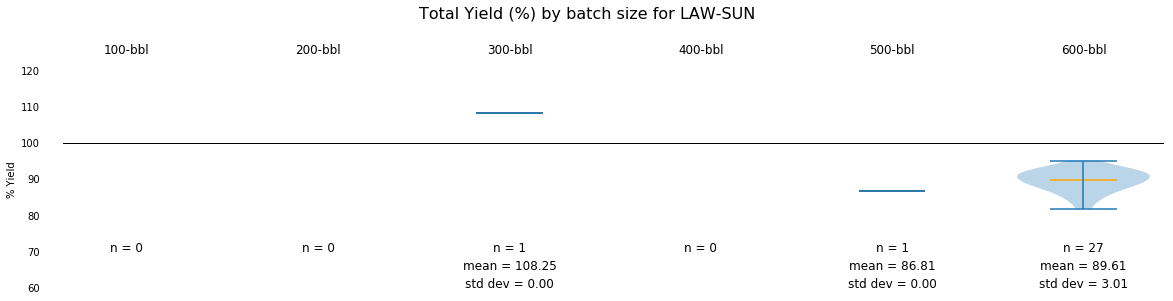

In [379]:
plot_data_brand_bsize('LAW-SUN')

In [360]:
res = df['Brand'].value_counts()
brands_hi_vol = res[res > 8].index.tolist()
brands_hi_vol

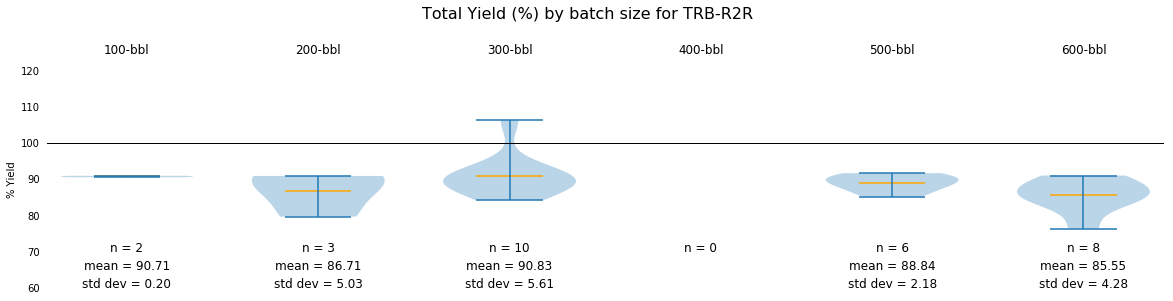

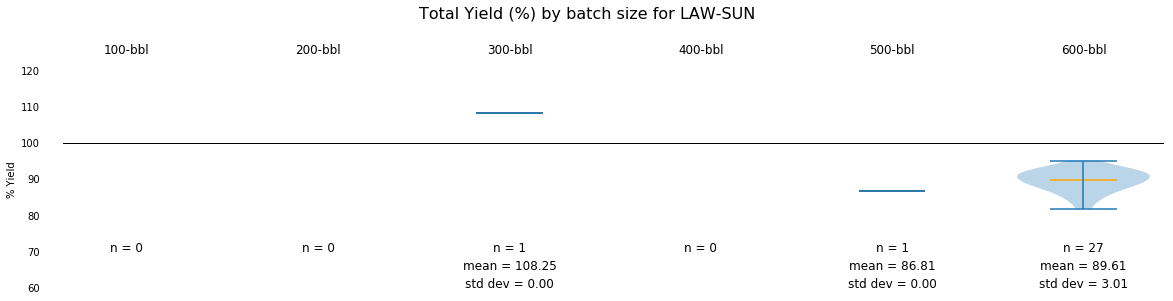

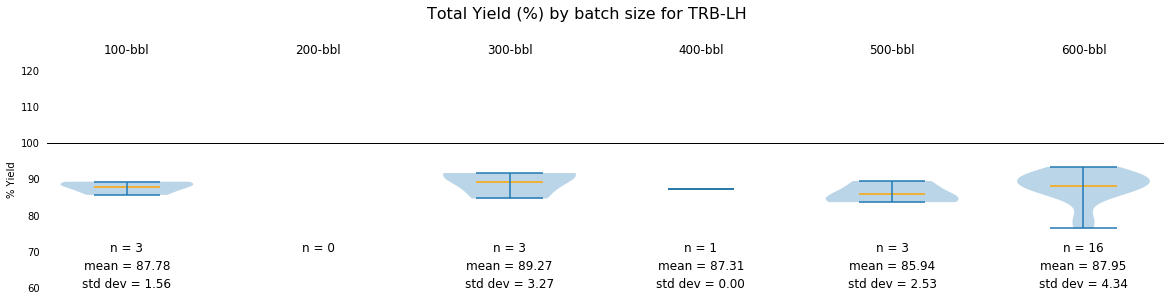

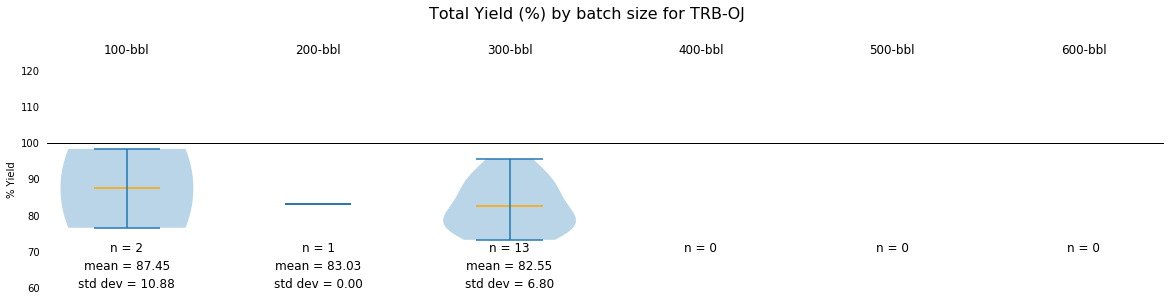

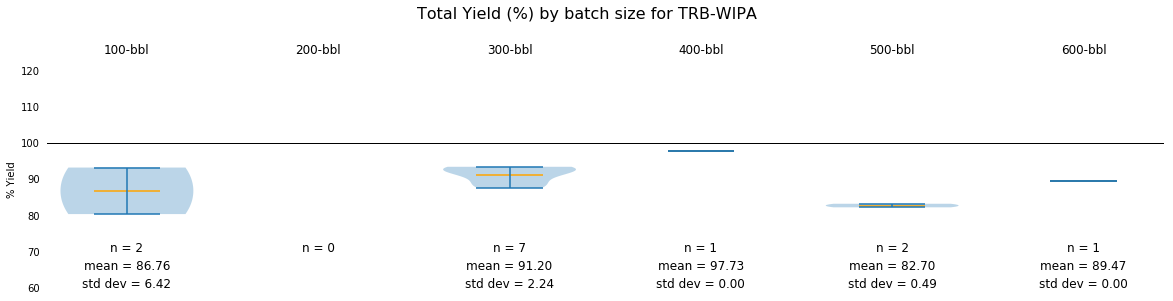

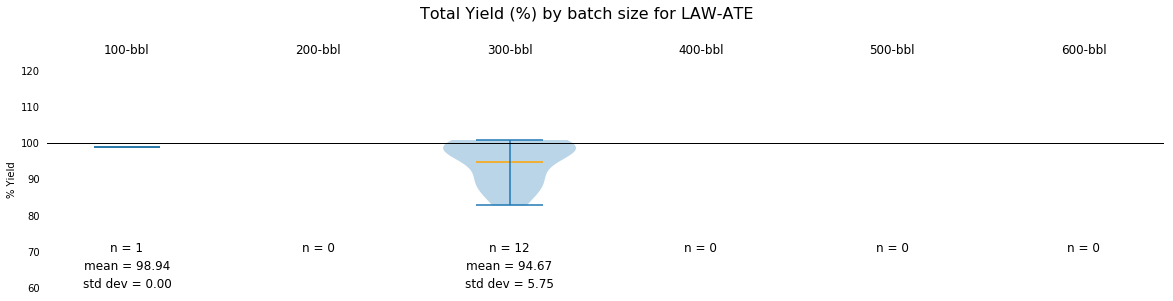

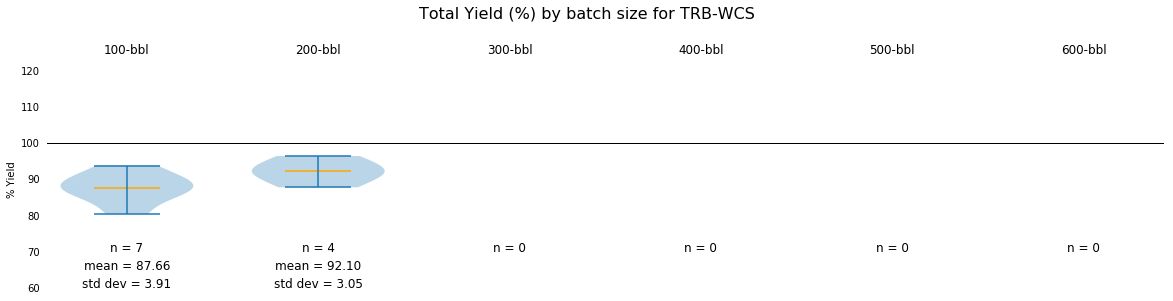

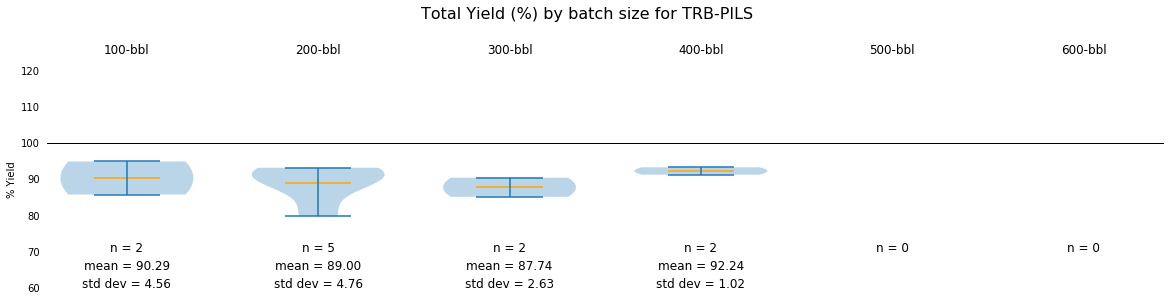

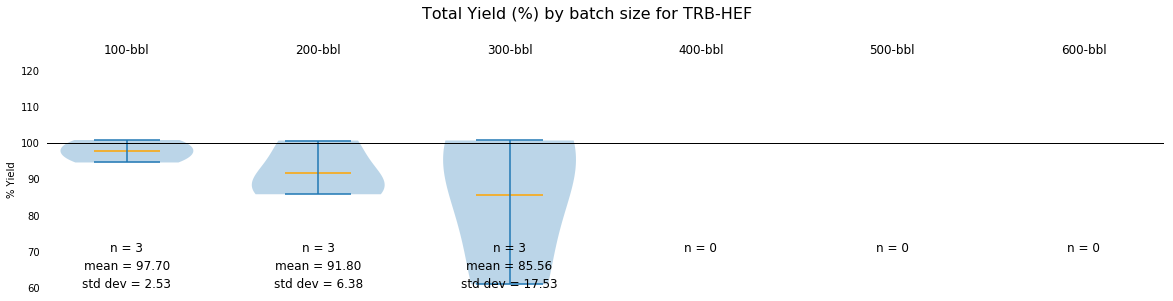

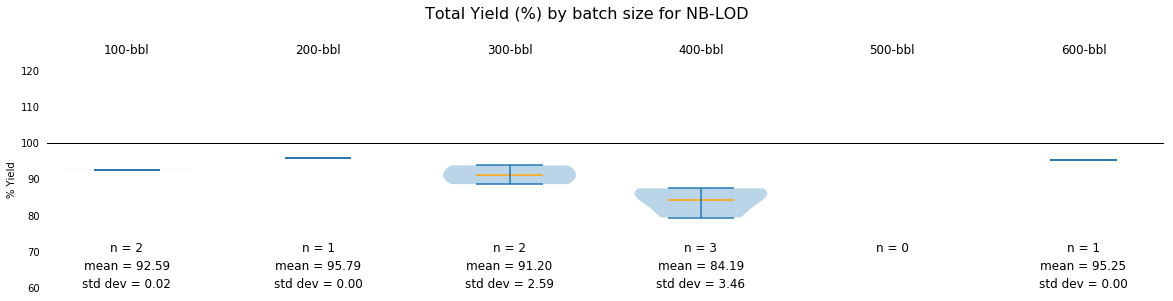

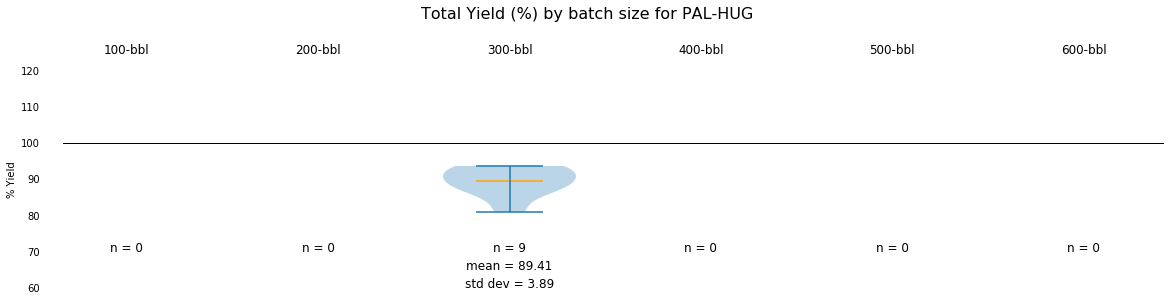

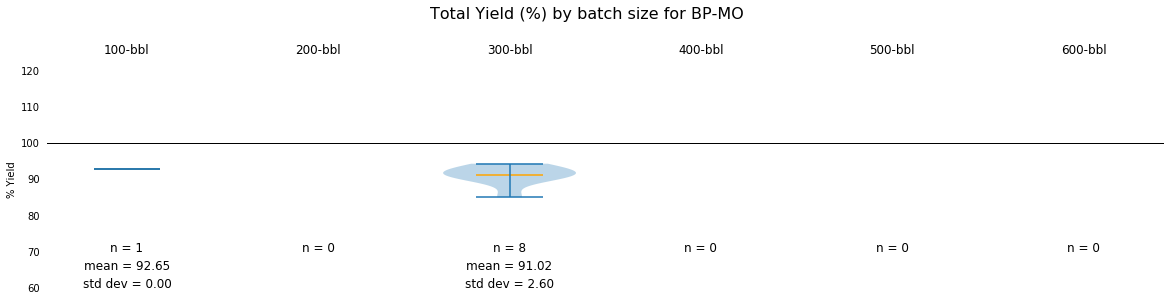

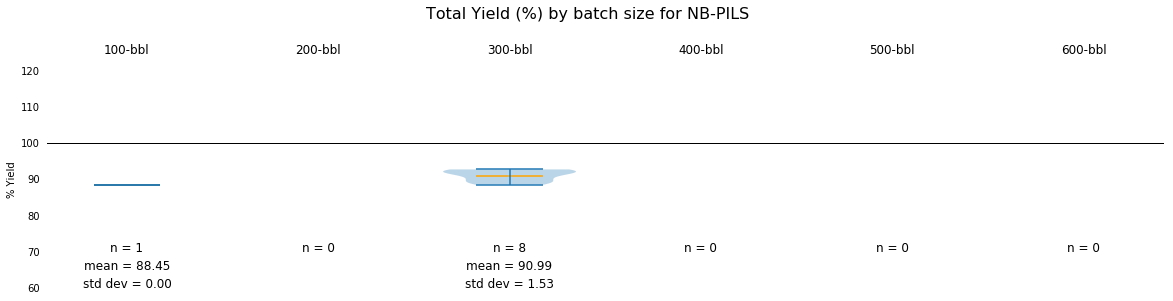

In [384]:
for br in brands_hi_vol:
    plot_data_brand_bsize(br)

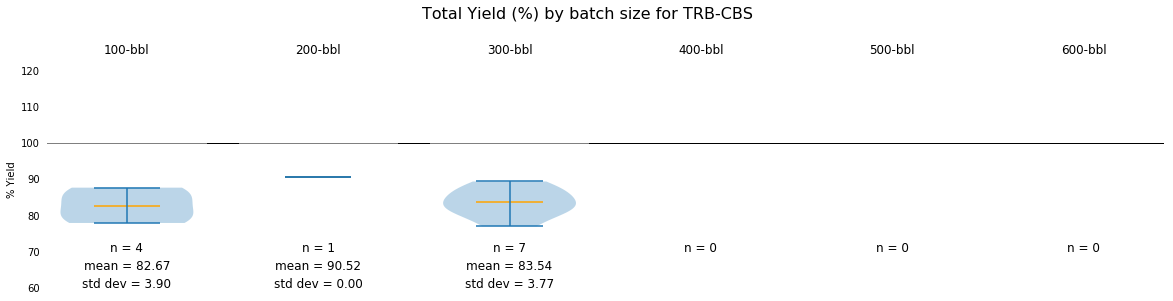

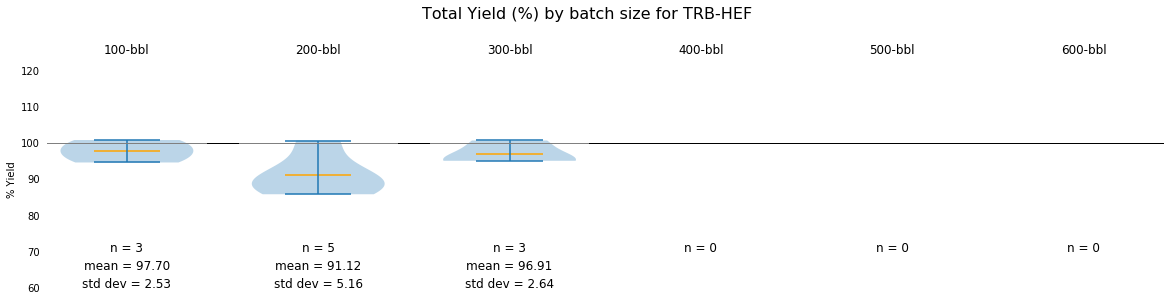

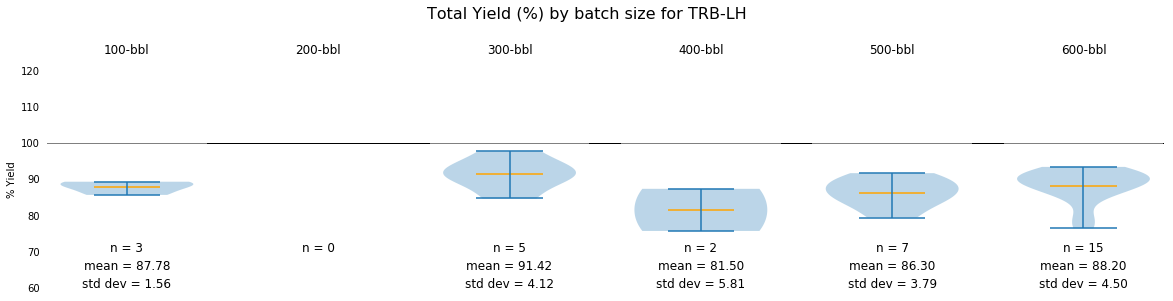

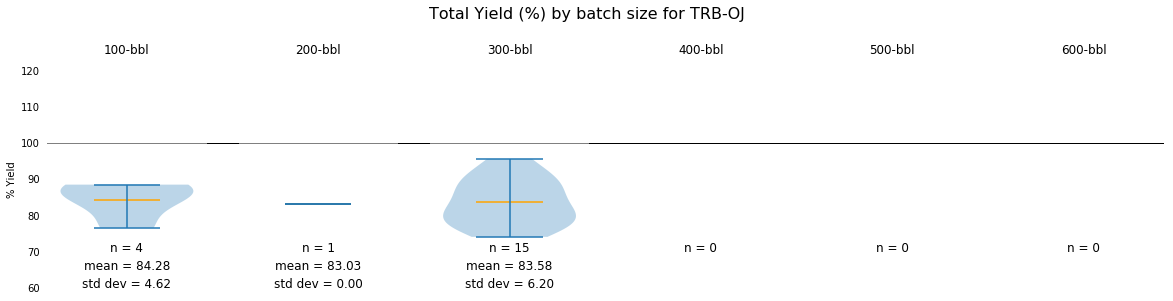

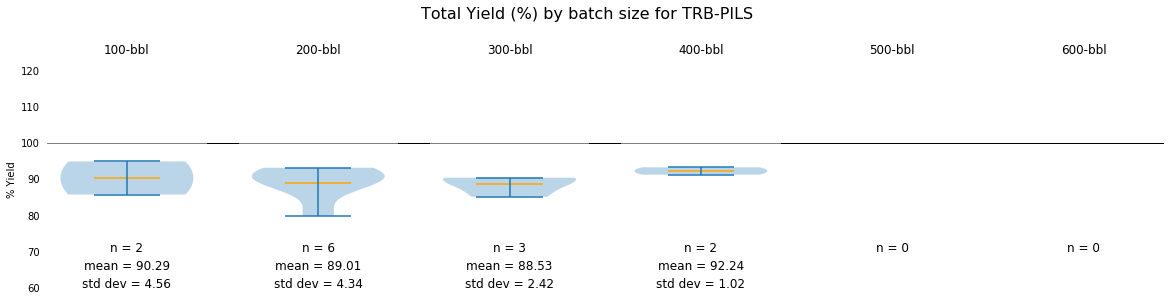

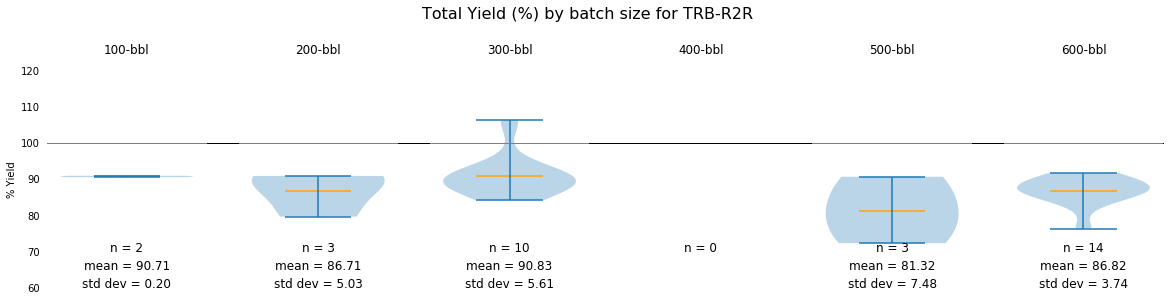

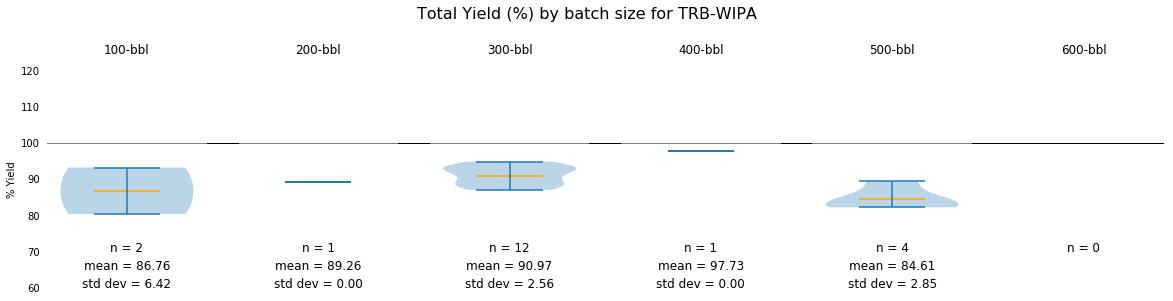

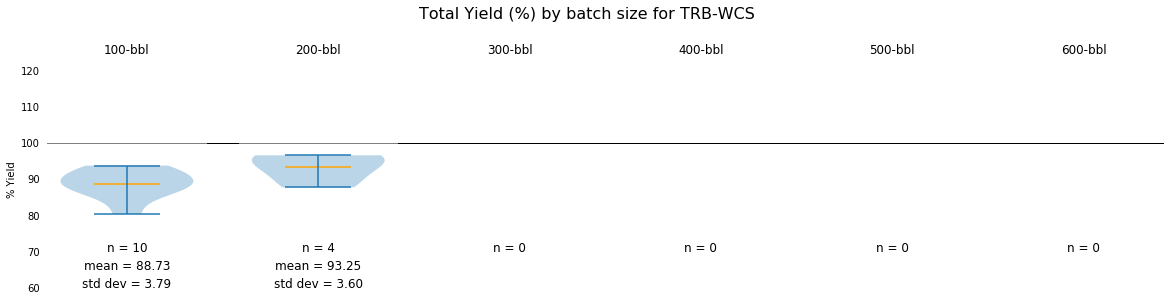

In [53]:
for br in brand_list:
    violin_plot_trb_brand_bsize(br, 'Total Yield %')

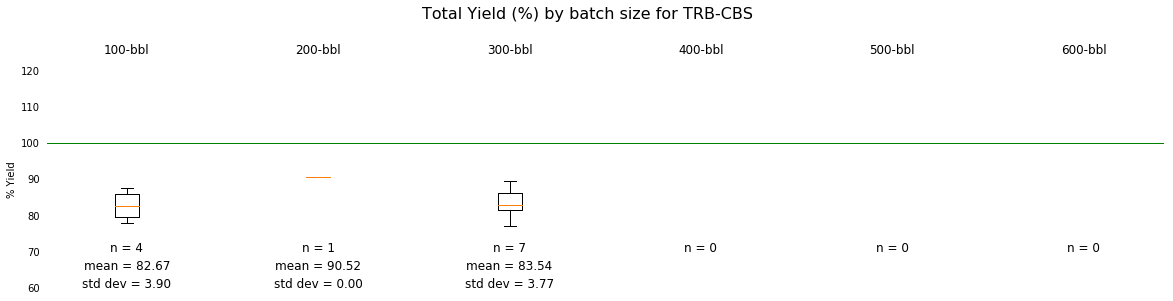

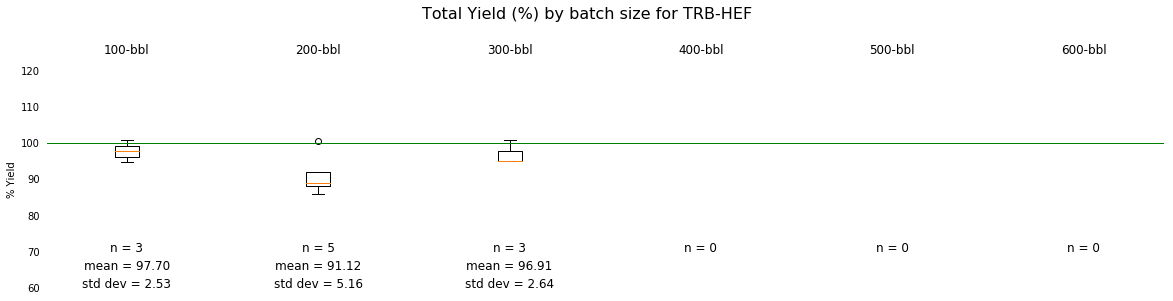

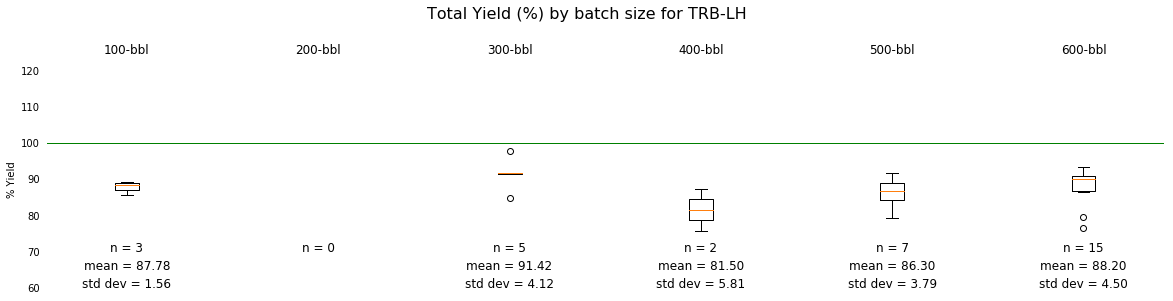

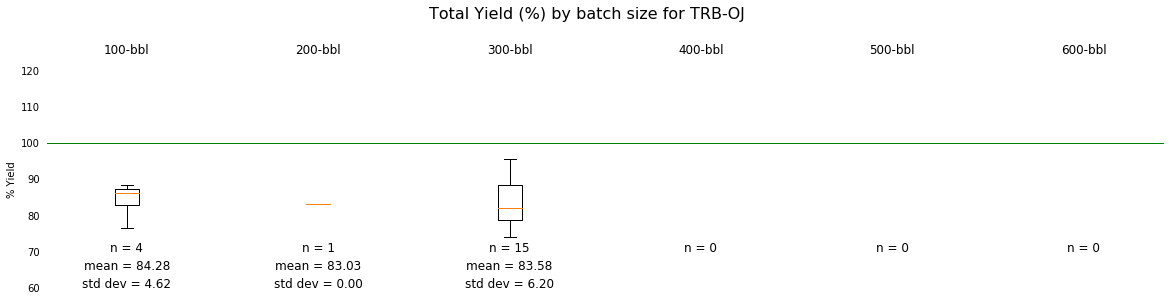

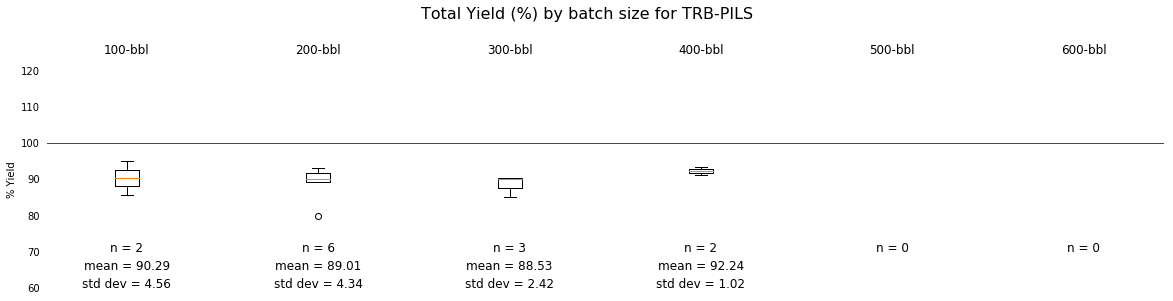

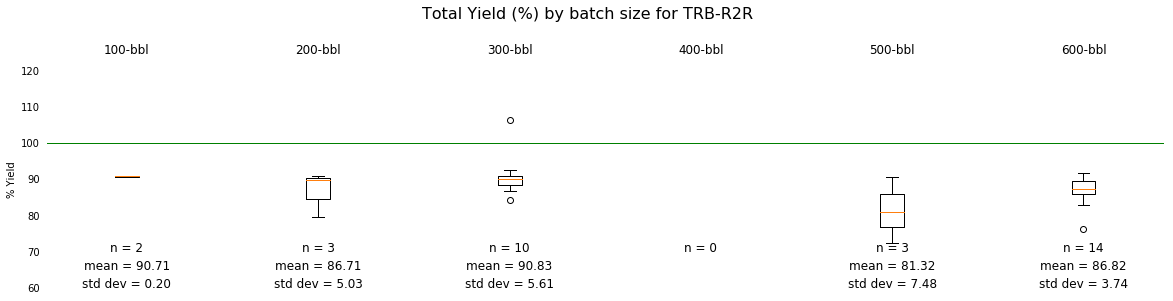

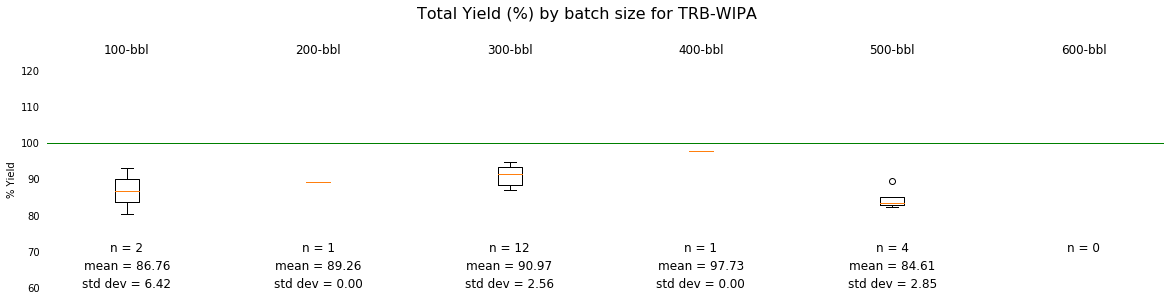

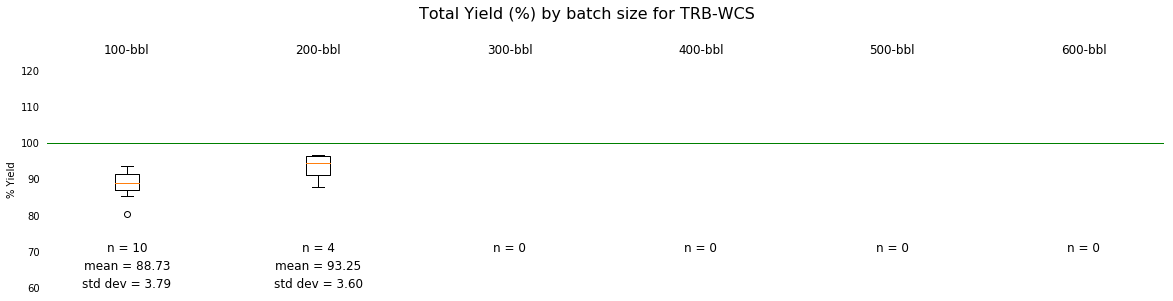

In [54]:
for br in brand_list:
    boxplot_trb_brand_bsize(br, 'Total Yield %')